In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
# import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
from statistics import mode
# import ipyparams # only in notebook, not in jupyter lab

In [2]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "total_defl_combined_moliere"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

# E_i = 1 PeV

In [3]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_1PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict[df] = df_dict_unsorted[df]
# print(df_dict.keys())
E_f = sorted(E_f_unsorted)
# E_f

In [4]:
df_dict['df_10']

,E_i,E_f,distances,deflection,x_dir_i,y_dir_i,z_dir_i,x_i,y_i,z_i,x_f,y_f,z_f
0,1000000.0,10.0,18852.879724,0.896807,0.0,0.0,1.0,0.0,0.0,0.0,290.455503,269.432853,1.885287e+06
1,1000000.0,10.0,13423.779349,1.569616,0.0,0.0,1.0,0.0,0.0,0.0,268.498060,21.307289,1.342376e+06
2,1000000.0,10.0,23550.824371,1.257419,0.0,0.0,1.0,0.0,0.0,0.0,-226.877047,479.595377,2.355080e+06
3,1000000.0,10.0,21832.884445,1.515534,0.0,0.0,1.0,0.0,0.0,0.0,-350.451140,-994.230364,2.183279e+06
4,1000000.0,10.0,16179.708714,1.609235,0.0,0.0,1.0,0.0,0.0,0.0,427.836255,-40.796922,1.617969e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,1000000.0,10.0,16088.731153,0.366483,0.0,0.0,1.0,0.0,0.0,0.0,-214.993102,647.360400,1.608872e+06
54996,1000000.0,10.0,17185.026032,1.070624,0.0,0.0,1.0,0.0,0.0,0.0,449.395969,856.964648,1.718499e+06
54997,1000000.0,10.0,18733.100881,1.341951,0.0,0.0,1.0,0.0,0.0,0.0,-70.994198,761.953280,1.873308e+06
54998,1000000.0,10.0,21686.419616,0.591249,0.0,0.0,1.0,0.0,0.0,0.0,-55.658897,761.579041,2.168640e+06


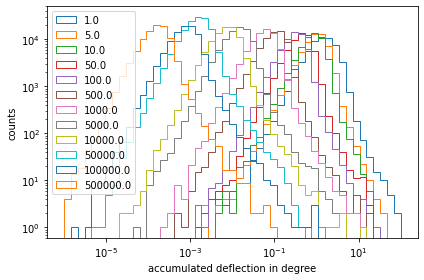

In [5]:
bins = np.logspace(-6, 2, 50)
for i,d in enumerate(df_dict):
    df = df_dict[d]
    plt.hist(df.deflection, bins=bins, histtype='step', label=E_f[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections.pdf')

# E_i = 100 TeV

In [6]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_100TeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict_100 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_100[df] = df_dict_unsorted[df]
# print(df_dict_100.keys())
E_f_100 = sorted(E_f_unsorted)
# E_f_100

# E_i = 10 TeV

In [7]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10TeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict_10 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10[df] = df_dict_unsorted[df]
# print(df_dict_10.keys())
E_f_10 = sorted(E_f_unsorted)
# E_f_10

# E_i = 10 PeV

In [8]:
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df

    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]

df_dict_10P = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10P[df] = df_dict_unsorted[df]
# print(df_dict_10P.keys())
E_f_10P = sorted(E_f_unsorted)
# E_f_10P

# Comparison E_i: 10 TeV / 100 Tev / 1 PeV / 10 PeV

# Use median and central intervals

In [9]:
# E_i = 10 PeV
deflection_median_10P = []
deflection_median_lower_10P = [] 
deflection_median_upper_10P = []
for d in df_dict_10P:
    df = df_dict_10P[d]
    deflection_median_10P.append(np.median(df.deflection))
    deflection_median_lower_10P.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_10P.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))

# E_i = 1 PeV    
deflection_median_1P = []
deflection_median_lower_1P = [] 
deflection_median_upper_1P = []
for d in df_dict:
    df = df_dict[d]
    deflection_median_1P.append(np.median(df.deflection))
    deflection_median_lower_1P.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_1P.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))
    
# E_i = 100 TeV
deflection_median_100 = []
deflection_median_lower_100 = [] 
deflection_median_upper_100 = []
for d in df_dict_100:
    df = df_dict_100[d]
    deflection_median_100.append(np.median(df.deflection))
    deflection_median_lower_100.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_100.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))

# E_i = 10 TeV    
deflection_median_10 = []
deflection_median_lower_10 = [] 
deflection_median_upper_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    deflection_median_10.append(np.median(df.deflection))
    deflection_median_lower_10.append(np.median(df.deflection) - np.quantile(df.deflection, 0.025)) # 95% content
    deflection_median_upper_10.append(np.quantile(df.deflection, 0.975) - np.median(df.deflection))

poly params:  [ 0.0176392  -0.23250873  0.08608498  0.0776035 ] , errors:  [0.00159071 0.0162471  0.0462519  0.03546731]
efit params:  [-3.51993098  0.13286249  3.88746573] , errors:  [1.24098351 0.03105478 1.32387531]
efit params:  [-1.56922833  0.227753    1.83613112] , errors:  [0.34270699 0.02789606 0.39362712]
efit params:  [-0.87745755  0.32194054  1.0807138 ] , errors:  [0.15656473 0.02957834 0.18925634]
efit params:  [-0.48077267  0.44981416  0.6361365 ] , errors:  [0.04899487 0.02219258 0.06179226]


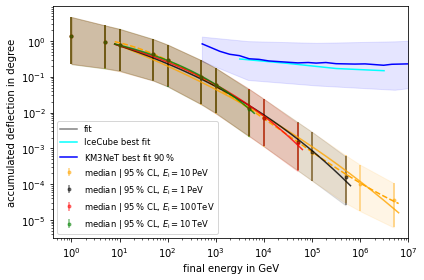

In [10]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1) # , label='poly')


# e-fit 
def efit(x, a, b, c):
    return a * np.exp(b * x) + c

# E_i = 10 PeV
params, cov = curve_fit(efit, np.log10(E_f_10P), np.log10(deflection_median_10P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8) # , label='efit')

plt.errorbar(E_f_10P, deflection_median_10P, yerr=(deflection_median_lower_10P, deflection_median_upper_10P), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P)-np.array(deflection_median_lower_10P), np.array(deflection_median_10P) + np.array(deflection_median_upper_10P), alpha=0.1, color='orange')


# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f), np.log10(deflection_median_1P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 5.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='black', alpha=0.8) # , label='efit')

plt.errorbar(E_f, deflection_median_1P, yerr=(deflection_median_lower_1P, deflection_median_upper_1P), fmt='.', color='black', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P)-np.array(deflection_median_lower_1P), np.array(deflection_median_1P) + np.array(deflection_median_upper_1P), alpha=0.1, color='black')


# E_i = 100 TeV
params, cov = curve_fit(efit, np.log10(E_f_100), np.log10(deflection_median_100))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 4.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='red', alpha=0.8) #, label='efit')

plt.errorbar(E_f_100, deflection_median_100, yerr=(deflection_median_lower_100, deflection_median_upper_100), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100)-np.array(deflection_median_lower_100), np.array(deflection_median_100) + np.array(deflection_median_upper_100), alpha=0.1, color='red')


# E_i = 10 TeV
params, cov = curve_fit(efit, np.log10(E_f_10), np.log10(deflection_median_10))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 3.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='green', alpha=0.8) #, label='efit')

plt.errorbar(E_f_10, deflection_median_10, yerr=(deflection_median_lower_10, deflection_median_upper_10), fmt='.', color='green', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10)-np.array(deflection_median_lower_10), np.array(deflection_median_10) + np.array(deflection_median_upper_10), alpha=0.1, color='green')

plt.plot(0, 0, '-', color='grey', label='fit')

# IceCube 2021
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# KM3NeT 2016
KM3NeT_median_error_E = [522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156]
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit $90\,$%')
x = [514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7]
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(x, y_low, y_up, alpha=0.1, color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.legend(fontsize='small', loc='lower left', )
plt.xlim(right=1e7)
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl.pdf')

efit params:  [-1.56922833  0.227753    1.83613112] , errors:  [0.34270699 0.02789606 0.39362712]


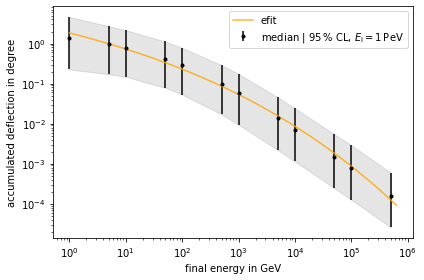

In [15]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)

# E_i = 1 PeV
params, cov = curve_fit(efit, np.log10(E_f), np.log10(deflection_median_1P))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.001, 5.8, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8, label='efit')

plt.errorbar(E_f, deflection_median_1P, yerr=(deflection_median_lower_1P, deflection_median_upper_1P), fmt='.', color='black', alpha=1, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P)-np.array(deflection_median_lower_1P), np.array(deflection_median_1P) + np.array(deflection_median_upper_1P), alpha=0.1, color='black')



plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_1PeV.pdf')

# 10% cut of E_min

In [16]:
mi = 0.9

# E_i = 10 PeV
deflection_median_10P_cut_10 = []
deflection_median_lower_10P_cut_10 = [] 
deflection_median_upper_10P_cut_10 = []
for i,d in enumerate(df_dict_10P):
    df = df_dict_10P[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df)))) 
    deflection_median_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_10P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 1 PeV    
deflection_median_1P_cut_10 = []
deflection_median_lower_1P_cut_10 = [] 
deflection_median_upper_1P_cut_10 = []
for d in df_dict:
    df = df_dict[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_1P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    
# E_i = 100 TabNine::eV
deflection_median_100_cut_10 = []
deflection_median_lower_100_cut_10 = [] 
deflection_median_upper_100_cut_10 = []
for d in df_dict_100:
    df = df_dict_100[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_100_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 10 TeV    
deflection_median_10_cut_10 = []
deflection_median_lower_10_cut_10 = [] 
deflection_median_upper_10_cut_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.025)) # 95% content
    deflection_median_upper_10_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], 0.975) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

df_14 10000000.0 1.0 95000 94942 0.9895894736842106 0.9993894736842105 1001.0
df_13 10000000.0 5.0 95000 93946 0.9504 0.9889052631578947 1011.0
df_10 10000000.0 10.0 55000 53579 0.9276181818181818 0.9741636363636363 1027.0
df_09 10000000.0 50.0 55000 50969 0.8173636363636364 0.9267090909090909 1079.0
df_04 10000000.0 100.0 57500 51418 0.7472869565217392 0.8942260869565217 1118.0
df_08 10000000.0 500.0 65000 50406 0.48624615384615383 0.7754769230769231 1290.0
df_03 10000000.0 1000.0 72500 51536 0.34355862068965515 0.7108413793103449 1407.0
df_07 10000000.0 5000.0 85000 51362 0.10603529411764706 0.6042588235294117 1655.0
df_02 10000000.0 10000.0 87500 50512 0.05739428571428572 0.57728 1732.0
df_06 10000000.0 50000.0 142500 78654 0.012063157894736842 0.5519578947368421 1812.0
df_01 10000000.0 100000.0 92500 50343 0.006054054054054054 0.5442486486486486 1837.0
df_05 10000000.0 500000.0 92500 49829 0.001081081081081081 0.5386918918918919 1856.0
df_11 10000000.0 1000000.0 95000 50605 0.00071

poly params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


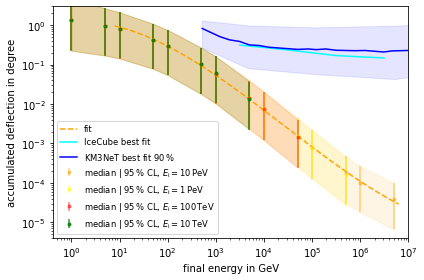

In [17]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='fit')



plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')


# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')


# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')


# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')



# IceCube 2021, https://arxiv.org/abs/2103.16931
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# KM3NeT 2016, https://arxiv.org/abs/1601.07459
KM3NeT_median_error_E = [522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156]
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit $90\,$%')
x = [514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7]
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(x, y_low, y_up, alpha=0.1, color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.xlim(right=1e7)
plt.ylim(4e-6, 3)
plt.legend(fontsize='small', loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly.pdf')

In [18]:
IceCube_191008488 = pd.read_csv('angular_resolution/IceCube_1910.08488.csv', sep=';', names=['E', 'theta'], decimal=',')  
ARCA = pd.read_csv('angular_resolution/ARCA.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_high = pd.read_csv('angular_resolution/ARCA_high.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_low = pd.read_csv('angular_resolution/ARCA_low.csv', sep=';', decimal=',', names=['E', 'theta'])

poly params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


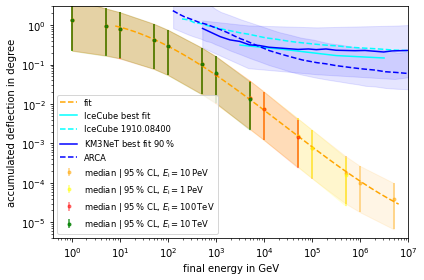

In [19]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='fit')



plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')


# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')


# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')


# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')



# IceCube 2021, https://arxiv.org/abs/2103.16931
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# IceCube ~2018
plt.plot(10**IceCube_191008488.E, 10**IceCube_191008488.theta, '--', color='cyan', label='IceCube 1910.08400')


# KM3NeT 2016, https://arxiv.org/abs/1601.07459
KM3NeT_median_error_E = [522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156]
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit $90\,$%')
x = [514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7]
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(x, y_low, y_up, alpha=0.1, color='blue')

# ARCA 2021 preliminary
plt.plot(10**ARCA.E, 10**ARCA.theta, '--', color='blue', label='ARCA')
plt.fill_between(10**ARCA_low.E, 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.1, color='blue')



plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.xlim(right=1e7)
plt.ylim(4e-6, 3)
plt.legend(fontsize='small', loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution.pdf')

poly params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


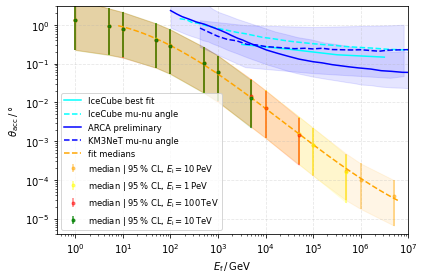

In [20]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))

plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')


# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')


# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')


# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')


###### comparison to current neutrino telescopes ##########


# rescale neutrino energy to muon energy
def rescale_neutrino_E_to_muon_E(x):
    # naive rescale
    return x * 0.8


# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# IceCube ~2018 1910.08488 (median angle between simulated neutrino and reconstructed muon as function of neutrino energy)
plt.plot(rescale_neutrino_E_to_muon_E(10**IceCube_191008488.E), 10**IceCube_191008488.theta, '--', color='cyan', 
         label='IceCube mu-nu angle')


# ARCA 2021 2107.12050 (angular resolution as function of neutrino energy) preliminary
plt.plot(rescale_neutrino_E_to_muon_E(10**ARCA.E), 10**ARCA.theta, '-', color='blue', label='ARCA preliminary')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**ARCA_low.E), 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.1, color='blue')


# KM3NeT 2016, https://arxiv.org/abs/1601.07459 (median angle between simulated neutrino and reconstructed muon 
# as function of neutrino energy)
# with 90% best fit interval
KM3NeT_median_error_E = np.array([522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156])
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(rescale_neutrino_E_to_muon_E(KM3NeT_median_error_E), KM3NeT_median_error_theta, '--', color='blue', 
         label='KM3NeT mu-nu angle')# best fit $90\,$%')
x = np.array([514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7])
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(rescale_neutrino_E_to_muon_E(x), y_low, y_up, alpha=0.1, color='blue')

# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='fit medians')

# plt.text(3e4, 1.2e-2, "rescale to neutrino energy", color='red')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.xlim(right=1e7)
plt.ylim(4e-6, 3)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(fontsize='small', loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution_paper.pdf')

In [21]:
# print median values for E_i = 1 PeV with lower and upper 95% limits
for i, e,d in zip(range(len(E_f)), E_f, deflection_median_1P_cut_10):
    print('E_f = {} GeV, med(d) = {} ° - {} ° + {} °'.format(e, d, d-deflection_median_lower_1P_cut_10[i], d+deflection_median_upper_1P_cut_10[i]))

E_f = 1.0 GeV, med(d) = 1.3604512699338573 ° - 0.2252193762101887 ° + 4.611562211266985 °
E_f = 5.0 GeV, med(d) = 0.952614025178979 ° - 0.1713530690625357 ° + 2.675019395753 °
E_f = 10.0 GeV, med(d) = 0.7927173824614776 ° - 0.14822654637611676 ° + 2.116198333192273 °
E_f = 50.0 GeV, med(d) = 0.4213334170461231 ° - 0.07826099674373155 ° + 1.0880708732549256 °
E_f = 100.0 GeV, med(d) = 0.2920281231686144 ° - 0.05398354710803954 ° + 0.7536732401335691 °
E_f = 500.0 GeV, med(d) = 0.10172736431524004 ° - 0.017849736296515543 ° + 0.2685311285118863 °
E_f = 1000.0 GeV, med(d) = 0.059217068634979365 ° - 0.010011276516561314 ° + 0.1603757158408989 °
E_f = 5000.0 GeV, med(d) = 0.014164233999297645 ° - 0.002331446767644303 ° + 0.03930746288820953 °
E_f = 10000.0 GeV, med(d) = 0.0073551899251443785 ° - 0.0012201716229512573 ° + 0.020602378167500785 °
E_f = 50000.0 GeV, med(d) = 0.0015315073912256488 ° - 0.0002586989090174757 ° + 0.004306584856400331 °
E_f = 100000.0 GeV, med(d) = 0.000789943656368

In [22]:
np.array(deflection_median_1P_cut_10)

array([1.36045127e+00, 9.52614025e-01, 7.92717382e-01, 4.21333417e-01,
       2.92028123e-01, 1.01727364e-01, 5.92170686e-02, 1.41642340e-02,
       7.35518993e-03, 1.53150739e-03, 7.89943656e-04, 1.58362929e-04],
      dtype=float128)

## get distance for E_i = 1 PeV and E_f = 500 GeV

median dist:  17521.549791812235
low dist 95%:  8039.545665632053
high dist 95%:  26518.59826374591


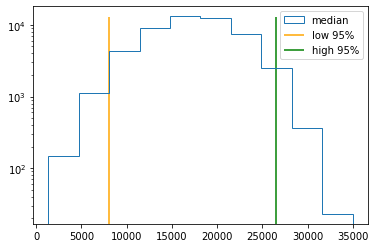

In [23]:
mi = 0.9
median_dist_1_500 = np.median(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500])
print('median dist: ', median_dist_1_500)
low_dist_1_500 = np.quantile(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], 0.025)
print('low dist 95%: ', low_dist_1_500)
high_dist_1_500 = np.quantile(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], 0.975) # - median_dist_1_500
print('high dist 95%: ', high_dist_1_500)

plt.hist(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], histtype='step', label='median')
plt.vlines(low_dist_1_500, 0, 13e3, color='orange', label='low 95%')
plt.vlines(high_dist_1_500, 0, 13e3, color='green', label='high 95%')
plt.yscale('log')
plt.legend()

# kinematic scattering angle between muon and incoming neutrino 

In [24]:
# Neutrino Review Paper, ref 21
def get_mu_nu_rms_theta(E):
    '''
    Parameters
    ----------
        E: neutrino energy in TeV
    Returns
    -------
        rms_theta: root mean squared scattering angle in degree
        
    '''
    return 1.5 / np.sqrt(E)


def get_mu_nu_theta(E, rnd_state):
    '''
    Parameters
    ----------
        E: neutrino energy in TeV
    Returns
    -------
        theta: scattering angle between muon and neutrino in degree
        
    '''
    rms_theta = get_mu_nu_rms_theta(E)
    theta = np.sqrt(rnd_state.exponential(rms_theta**2))
    return theta

# Neutrino Review Paper, ref 114
def get_mean_theta(E):
    '''
    Parameters
    ----------
        E: neutrino energy in TeV
    Returns
    -------
        mean_theta: mean scattering angle in degree
        
    '''
    return 0.7 / E**0.6

In [25]:
rnd_state = np.random.RandomState(42)

In [26]:
E_nu = 1e3 # neutrino energy in TeV
print('rms_theta: ', get_mu_nu_rms_theta(E_nu))
print('mean_theta: ', get_mean_theta(E_nu))
print('sampled theta: ', get_mu_nu_theta(E_nu, rnd_state))

rms_theta:  0.047434164902525694
mean_theta:  0.011094252347227796
sampled theta:  0.03249389484884711


Text(0.5, 1.0, 'E_nu = 1000000.0 TeV')

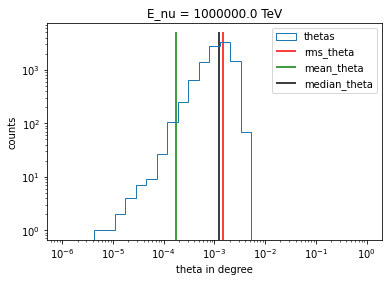

In [27]:
E_nu = 1e6 # neutrino energy in TeV

bins = np.logspace(-6, 0, 30)
n_events = 10000
thetas = [get_mu_nu_theta(E_nu, rnd_state) for i in range(n_events)]
plt.hist(thetas, bins=bins, histtype='step', label='thetas')
plt.vlines(get_mu_nu_rms_theta(E_nu), 0, 0.5 * n_events, color='red', label='rms_theta')
plt.vlines(get_mean_theta(E_nu), 0, 0.5 * n_events, color='green', label='mean_theta')
plt.vlines(np.median(thetas), 0, 0.5 * n_events, color='black', label='median_theta')
plt.xlabel('theta in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('E_nu = {} TeV'.format(E_nu))

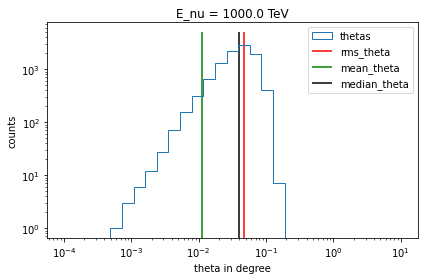

In [28]:
E_nu = 1e3 # neutrino energy in TeV

bins = np.logspace(-4, 1, 30)
n_events = 10000
thetas = [get_mu_nu_theta(E_nu, rnd_state) for i in range(n_events)]
plt.hist(thetas, bins=bins, histtype='step', label='thetas')
plt.vlines(get_mu_nu_rms_theta(E_nu), 0, 0.5 * n_events, color='red', label='rms_theta')
plt.vlines(get_mean_theta(E_nu), 0, 0.5 * n_events, color='green', label='mean_theta')
plt.vlines(np.median(thetas), 0, 0.5 * n_events, color='black', label='median_theta')
plt.xlabel('theta in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('E_nu = {} TeV'.format(E_nu))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'muon_neutrino_kinematic_1PeV_sampled.pdf')

Text(0.5, 1.0, 'E_nu = 0.1 TeV')

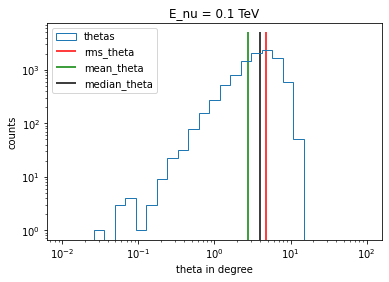

In [29]:
E_nu = 1e-1 # neutrino energy in TeV

bins = np.logspace(-2, 2, 30)
n_events = 10000
thetas = [get_mu_nu_theta(E_nu, rnd_state) for i in range(n_events)]
plt.hist(thetas, bins=bins, histtype='step', label='thetas')
plt.vlines(get_mu_nu_rms_theta(E_nu), 0, 0.5 * n_events, color='red', label='rms_theta')
plt.vlines(get_mean_theta(E_nu), 0, 0.5 * n_events, color='green', label='mean_theta')
plt.vlines(np.median(thetas), 0, 0.5 * n_events, color='black', label='median_theta')
plt.xlabel('theta in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left')
plt.title('E_nu = {} TeV'.format(E_nu))

100%|██████████| 30/30 [00:02<00:00, 14.53it/s]


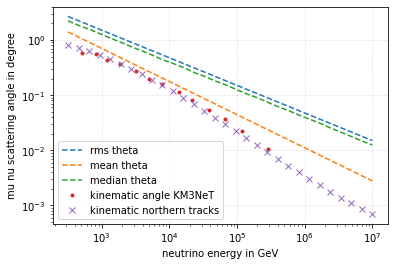

In [30]:
E_nus = np.logspace(-0.5, 4, 30) # in TeV
rms_thetas = [get_mu_nu_rms_theta(E_nu) for E_nu in E_nus]
mean_thetas = [get_mean_theta(E_nu) for E_nu in E_nus]
median_thetas = []
n_events = 10000
for E_nu in tqdm(E_nus):
    thetas = [get_mu_nu_theta(E_nu, rnd_state) for i in range(n_events)]
    median_thetas.append(np.median(thetas))
    
plt.plot(E_nus*1e3, rms_thetas, '--', label='rms theta')
plt.plot(E_nus*1e3, mean_thetas, '--', label='mean theta')
plt.plot(E_nus*1e3, median_thetas, '--', label='median theta')



# read in kinematic angle from KM3NeT plot
kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(kinematic_angle.E, kinematic_angle.theta, '.', label='kinematic angle KM3NeT')


# kinematic angle of northern tracks
def polyfit(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
params = [ 0.02282598, -0.35627049,  1.04292748, -0.82902074]
plt.plot(E_nus*1e3, np.power(10, polyfit(np.log10(E_nus*1e3), *params)), 'x', label='kinematic northern tracks')



plt.xlabel('neutrino energy in GeV')
plt.ylabel('mu nu scattering angle in degree')
plt.xscale('log')
plt.yscale('log')
plt.grid(linestyle='--', alpha=0.3)
plt.legend()

100%|██████████| 30/30 [00:02<00:00, 14.81it/s]

poly params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


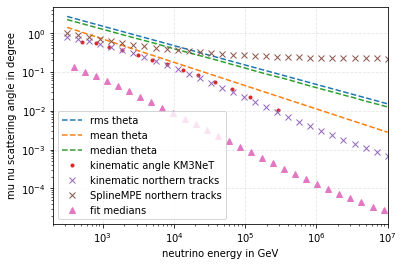

In [31]:
E_nus = np.logspace(-0.5, 4, 30) # in TeV
rms_thetas = [get_mu_nu_rms_theta(E_nu) for E_nu in E_nus]
mean_thetas = [get_mean_theta(E_nu) for E_nu in E_nus]
median_thetas = []
n_events = 10000
for E_nu in tqdm(E_nus):
    thetas = [get_mu_nu_theta(E_nu, rnd_state) for i in range(n_events)]
    median_thetas.append(np.median(thetas))
    
plt.plot(E_nus*1e3, rms_thetas, '--', label='rms theta')
plt.plot(E_nus*1e3, mean_thetas, '--', label='mean theta')
plt.plot(E_nus*1e3, median_thetas, '--', label='median theta')



# read in kinematic angle from KM3NeT plot
kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(kinematic_angle.E, kinematic_angle.theta, '.', label='kinematic angle KM3NeT')


# kinematic angle of northern tracks
def polyfit(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
params = [ 0.02282598, -0.35627049,  1.04292748, -0.82902074]
plt.plot(E_nus*1e3, np.power(10, polyfit(np.log10(E_nus*1e3), *params)), 'x', label='kinematic northern tracks')


# angular resolution of northern tracks
def efit(x, a, b, c):
    return a * np.exp(-b*x) + c
params = [12.01682177,  1.09292917,  0.21396453]
plt.plot(E_nus*1e3, efit(np.log10(E_nus*1e3), *params), 'x', label='SplineMPE northern tracks')


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
# simple rescale from E_muon to E_nu
plt.plot((E_nus*1e3)/0.8, np.power(10, poly(np.log10(E_nus*1e3), *params)), '^', alpha=1, label='fit medians')



plt.xlabel('neutrino energy in GeV')
plt.ylabel('mu nu scattering angle in degree')
plt.xscale('log')
plt.yscale('log')
plt.xlim(2e2, 1e7)
plt.grid(linestyle='--', alpha=0.3)
plt.legend()

### compare resolutions

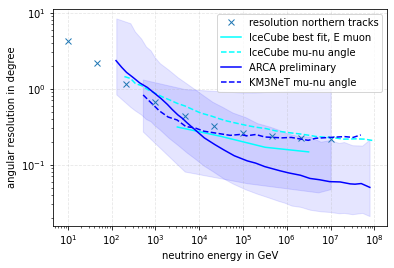

In [32]:
bins = np.logspace(1, 7, 10) # in GeV
E_nus = np.logspace(-2, 4, 10) # in TeV


# angular resolution of northern tracks
def efit(x, a, b, c):
    return a * np.exp(-b*x) + c
params = [12.01682177,  1.09292917,  0.21396453]
# plt.plot(E_nus*1e3, efit(np.log10(E_nus*1e3), *params), 'x', label='resolution northern tracks 1') # just for cross check
plt.plot(bins, efit(np.log10(bins), *params), 'x', label='resolution northern tracks')

# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit, E muon')

# IceCube ~2018 1910.08488 (median angle between simulated neutrino and reconstructed muon as function of neutrino energy)
plt.plot(10**IceCube_191008488.E, 10**IceCube_191008488.theta, '--', color='cyan', 
         label='IceCube mu-nu angle')

# ARCA 2021 2107.12050 (angular resolution as function of neutrino energy) preliminary
plt.plot(10**ARCA.E, 10**ARCA.theta, '-', color='blue', label='ARCA preliminary')
plt.fill_between(10**ARCA_low.E, 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.1, color='blue')


# KM3NeT 2016, https://arxiv.org/abs/1601.07459 (median angle between simulated neutrino and reconstructed muon 
# as function of neutrino energy)
# with 90% best fit interval
KM3NeT_median_error_E = np.array([522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156])
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '--', color='blue', 
         label='KM3NeT mu-nu angle')# best fit $90\,$%')
x = np.array([514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7])
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
plt.fill_between(x, y_low, y_up, alpha=0.1, color='blue')


plt.xlabel('neutrino energy in GeV')
plt.ylabel('angular resolution in degree')
plt.xscale('log')
plt.yscale('log')
plt.grid(linestyle='--', alpha=0.3)
plt.legend()

100%|██████████| 30/30 [00:02<00:00, 13.40it/s]


poly params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


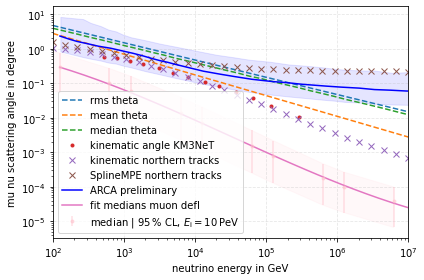

In [33]:
E_nus = np.logspace(-1, 4, 30) # in TeV
rms_thetas = [get_mu_nu_rms_theta(E_nu) for E_nu in E_nus]
mean_thetas = [get_mean_theta(E_nu) for E_nu in E_nus]
median_thetas = []
n_events = 10000
for E_nu in tqdm(E_nus):
    thetas = [get_mu_nu_theta(E_nu, rnd_state) for i in range(n_events)]
    median_thetas.append(np.median(thetas))
    
plt.plot(E_nus*1e3, rms_thetas, '--', label='rms theta')
plt.plot(E_nus*1e3, mean_thetas, '--', label='mean theta')
plt.plot(E_nus*1e3, median_thetas, '--', label='median theta')



# read in kinematic angle from KM3NeT plot
kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(kinematic_angle.E, kinematic_angle.theta, '.', label='kinematic angle KM3NeT')


# kinematic angle of northern tracks
def polyfit(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
params = [ 0.02282598, -0.35627049,  1.04292748, -0.82902074]
plt.plot(E_nus*1e3, np.power(10, polyfit(np.log10(E_nus*1e3), *params)), 'x', label='kinematic northern tracks')


# angular resolution of northern tracks
def efit(x, a, b, c):
    return a * np.exp(-b*x) + c
params = [12.01682177,  1.09292917,  0.21396453]
plt.plot(E_nus*1e3, efit(np.log10(E_nus*1e3), *params), 'x', label='SplineMPE northern tracks')


# ARCA 2021 2107.12050 (angular resolution as function of neutrino energy) preliminary
plt.plot(10**ARCA.E, 10**ARCA.theta, '-', color='blue', label='ARCA preliminary')
plt.fill_between(10**ARCA_low.E, 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.1, color='blue')


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
# rescale neutrino energy to muon energy via fix values 0.8 for first estimation
plt.plot((E_nus*1e3)/0.8, np.power(10, poly(np.log10(E_nus*1e3), *params)), '-', alpha=1, label='fit medians muon defl')


plt.errorbar(np.array(E_f_10P)/0.8, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='pink', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(np.array(E_f_10P)/0.8, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='pink')




plt.xlabel('neutrino energy in GeV')
plt.ylabel('mu nu scattering angle in degree')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2, 1e7)
plt.grid(linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'muon_neutrino_kinematic_comparison_with_resolution_and_defl_rescale_80percent_muon_interaction_approx.pdf')

## rescale from muon energy to neutrino energy using northern tracks

100%|██████████| 30/30 [00:02<00:00, 14.66it/s]


poly params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


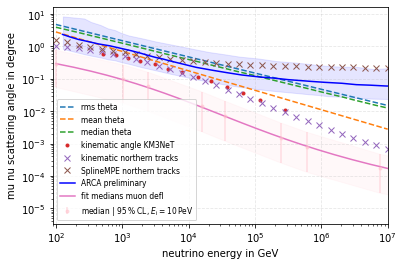

In [34]:
E_nus = np.logspace(-1, 4, 30) # in TeV
rms_thetas = [get_mu_nu_rms_theta(E_nu) for E_nu in E_nus]
mean_thetas = [get_mean_theta(E_nu) for E_nu in E_nus]
median_thetas = []
n_events = 10000
for E_nu in tqdm(E_nus):
    thetas = [get_mu_nu_theta(E_nu, rnd_state) for i in range(n_events)]
    median_thetas.append(np.median(thetas))
    
plt.plot(E_nus*1e3, rms_thetas, '--', label='rms theta')
plt.plot(E_nus*1e3, mean_thetas, '--', label='mean theta')
plt.plot(E_nus*1e3, median_thetas, '--', label='median theta')



# read in kinematic angle from KM3NeT plot
kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(kinematic_angle.E, kinematic_angle.theta, '.', label='kinematic angle KM3NeT')


# kinematic angle of northern tracks
def polyfit(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
params = [ 0.02282598, -0.35627049,  1.04292748, -0.82902074]
plt.plot(E_nus*1e3, np.power(10, polyfit(np.log10(E_nus*1e3), *params)), 'x', label='kinematic northern tracks')


# angular resolution of northern tracks
def efit(x, a, b, c):
    return a * np.exp(-b*x) + c
params = [12.01682177,  1.09292917,  0.21396453]
plt.plot(E_nus*1e3, efit(np.log10(E_nus*1e3), *params), 'x', label='SplineMPE northern tracks')


# ARCA 2021 2107.12050 (angular resolution as function of neutrino energy) preliminary
plt.plot(10**ARCA.E, 10**ARCA.theta, '-', color='blue', label='ARCA preliminary')
plt.fill_between(10**ARCA_low.E, 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.1, color='blue')


# rescale energy
def fit(x, c, d, e, f):
    return c * x**3 + d * x**2 + e * x + f
params_rescale = [-0.05217089,  0.58388352, -2.31617008,  2.71511755]



# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
# rescale neutrino energy to muon energy via fix values 0.8 for first estimation
plt.plot((E_nus*1e3) / np.clip(np.power(10, fit(np.log10(E_nus*1e3), *params_rescale)), 0, 1), np.power(10, poly(np.log10(E_nus*1e3), *params)), '-', alpha=1, label='fit medians muon defl')


plt.errorbar(np.array(E_f_10P) / np.clip(np.power(10, fit(np.log10(E_f_10P), *params_rescale)), 0, 1), deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='pink', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(np.array(E_f_10P) / np.clip(np.power(10, fit(np.log10(E_f_10P), *params_rescale)), 0, 1), np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='pink')




plt.xlabel('neutrino energy in GeV')
plt.ylabel('mu nu scattering angle in degree')
plt.xscale('log')
plt.yscale('log')
plt.xlim(9e1, 1e7)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(loc='lower left', fontsize=7.5) # bbox_to_anchor=(1.2,1.0))
# plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'muon_neutrino_kinematic_comparison_with_resolution_and_defl_rescale_muon_entry_E.pdf')

# do plot without IceCube simulations

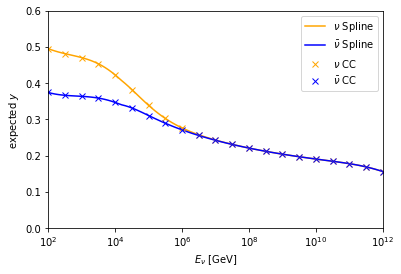

In [35]:
# Neutrino Review Paper Fig. 10
df_y = pd.read_hdf('data/y_data.hdf5')


spl_nu = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu(df_y.neutrino_energy), color='orange', label=r'$\nu$ Spline')

spl_nu_bar = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_bar_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu_bar(df_y.neutrino_energy), color='blue', label=r'$\bar{\nu}$ Spline')


plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_simps[::5], 'x', color='orange', label=r'$\nu \ \mathrm{CC}$')
plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_bar_simps[::5], 'x', color='blue', label=r'$\bar{\nu} \ \mathrm{CC}$')
plt.xscale('log')
plt.xlabel(r'$E_\nu$ [GeV]')
plt.ylabel(r'expected $y$')
plt.ylim(0., 0.6)
plt.xlim(1e2, 1e12)
plt.legend()
if save_plot:
    plt.savefig(plot_dir + 'expected_y.pdf')

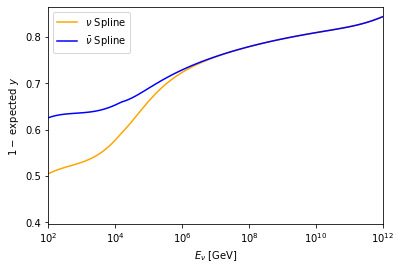

In [36]:
plt.plot(df_y.neutrino_energy, 1-spl_nu(df_y.neutrino_energy), color='orange', label=r'$\nu$ Spline')
plt.plot(df_y.neutrino_energy, 1-spl_nu_bar(df_y.neutrino_energy), color='blue', label=r'$\bar{\nu}$ Spline')

plt.xscale('log')
plt.xlabel(r'$E_\nu$ [GeV]')
plt.ylabel(r'$1 -$ expected $y$')
plt.xlim(1e2, 1e12)
plt.legend()
if save_plot:
    plt.savefig(plot_dir + 'expected_1-y.pdf')

poly params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


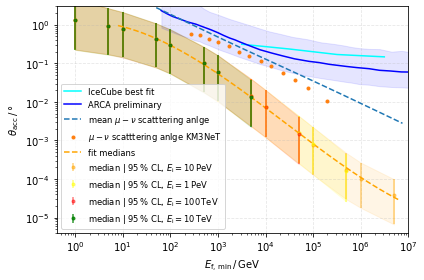

In [37]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))

plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')


# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')


# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')


# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')


###### comparison to current neutrino telescopes ##########


# rescale neutrino energy to muon energy
def rescale_neutrino_E_to_muon_E(x, naive=False, splines=None):
    if naive:
        # naive rescale
        return x * 0.8
    elif splines is not None:
        return (1 - splines(x)) * x
        
    else:
        print('No rescaling')
        return x 

naive_rescale = False
    
    
# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# IceCube ~2018 1910.08488 (median angle between simulated neutrino and reconstructed muon as function of neutrino energy)
# plt.plot(rescale_neutrino_E_to_muon_E(10**IceCube_191008488.E, naive=naive_rescale), 10**IceCube_191008488.theta, '--', color='cyan', 
#          label='IceCube mu-nu angle')


# ARCA 2021 2107.13050 (angular resolution as function of neutrino energy) preliminary
plt.plot(rescale_neutrino_E_to_muon_E(10**ARCA.E, naive=naive_rescale, splines=spl_nu), 10**ARCA.theta, '-', color='blue', label='ARCA preliminary')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**ARCA_low.E, naive=naive_rescale, splines=spl_nu), 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.1, color='blue')


# KM3NeT 2016, https://arxiv.org/abs/1601.07459 (median angle between simulated neutrino and reconstructed muon 
# as function of neutrino energy)
# with 90% best fit interval
KM3NeT_median_error_E = np.array([522.4356285756223, 1216.8748116390357, 1943.231716329505, 3103.1536417971624, 
                         4955.437091562044, 7913.355122889535, 12636.864951346342, 50689.50296608002, 
                         83427.93140908847, 121687.48116390369, 194323.17163295028, 315036.3417558579, 
                         779476.9527719838, 1263686.4951346342, 3079814.718585156, 4560541.30436924, 
                         9850144.98486653, 20642110.490612086, 32469485.711770043, 48811773.81527156])
KM3NeT_median_error_theta = [0.827576632070297, 0.5123763092955053, 0.42403066039938264, 0.38818709714958904, 
                             0.31722679466012654, 0.305443935560202, 0.2761187447596839, 0.24338923735390608, 
                             0.24960901930441665, 0.2403377094590886, 0.24960901930441665, 0.2314107669226327, 
                             0.22564445080444856, 0.22850942083969703, 0.20919338394904638, 0.22281540074690914,
                             0.22850942083969703, 0.23434895091387908, 0.22850942083969703, 0.24647950999050272]
# plt.plot(rescale_neutrino_E_to_muon_E(KM3NeT_median_error_E, naive=naive_rescale), KM3NeT_median_error_theta, '--', color='blue', 
#          label='KM3NeT mu-nu angle')# best fit $90\,$%')
x = np.array([514.606668672977, 4665.0087107025565,  123538.77161286505, 5224356.285756218, 1e7])
y_low = [0.27265686591460175, 0.08120617245807966, 0.05703801243761694, 0.04321320106658356, 0.0478]
y_up = [1.3199210201931573, 0.9874623548354361, 0.8814658257473126, 0.9750819022171437, 1.01]
# plt.fill_between(rescale_neutrino_E_to_muon_E(x, naive=naive_rescale), y_low, y_up, alpha=0.1, color='blue')

# mean scattering angle between simulated neutrino and muon
E_nus = np.logspace(-1, 4, 30) # in TeV
mean_thetas = [get_mean_theta(E_nu) for E_nu in E_nus]
plt.plot(rescale_neutrino_E_to_muon_E(E_nus*1e3, naive=naive_rescale, splines=spl_nu), mean_thetas, '--', label=r'mean $\mu - \nu$ scatttering anlge')

# kinematic angle read from KM3NeT
kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(kinematic_angle.E, splines=spl_nu), kinematic_angle.theta, '.', label=r'$\mu - \nu$ scatttering anlge KM3NeT')

# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='fit medians')

# plt.text(3e4, 1.2e-2, "rescale to neutrino energy", color='red')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.xlabel(r'$E_{\mathrm{f,\,min}}\,/\,$GeV')
plt.xlim(right=1e7)
plt.ylim(4e-6, 3)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(fontsize='small', loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution_rescale_no_icecube_paper.pdf')

poly params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


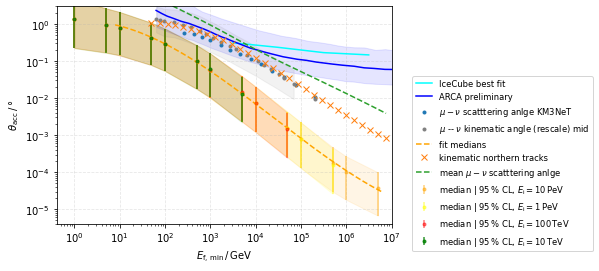

In [38]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)
# plt.figure(figsize=(12, 10))

plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')


# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')


# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median | $95\,$% CL, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')


# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median | $95\,$% CL, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')


###### comparison to current neutrino telescopes ##########


# rescale neutrino energy to muon energy
def rescale_neutrino_E_to_muon_E(x, naive=False, splines=None):
    if naive:
        # naive rescale
        return x * 0.8
    elif splines is not None:
        return (1 - splines(x)) * x
        
    else:
        print('No rescaling')
        return x 

naive_rescale = False
    
    
# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

# ARCA 2021 2107.13050 (angular resolution as function of neutrino energy) preliminary
plt.plot(rescale_neutrino_E_to_muon_E(10**ARCA.E, naive=naive_rescale, splines=spl_nu), 10**ARCA.theta, '-', color='blue', label='ARCA preliminary')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**ARCA_low.E, naive=naive_rescale, splines=spl_nu), 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.1, color='blue')

# kinematic angle read from KM3NeT
kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(kinematic_angle.E, splines=spl_nu), kinematic_angle.theta, '.', label=r'$\mu - \nu$ scatttering anlge KM3NeT')

# kinematic anlge reade from KM3NeT/ARCA 2021
kinematic_angle_low = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/Low.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_mid = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/mid.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_high = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/High.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(10**kinematic_angle_mid.E, splines=spl_nu), 10**kinematic_angle_mid.theta, '.', color='grey', label=r'$\mu$ -- $\nu$ kinematic angle (rescale) mid') # scattering angle KM3NeT')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), 10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[:-2], alpha=0.1, color='grey')

# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(0.9, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='fit medians')


##########
# kinematic angle of northern tracks
def polyfit(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
params = [ 0.02282598, -0.35627049,  1.04292748, -0.82902074]
plt.plot(rescale_neutrino_E_to_muon_E(E_nus*1e3, splines=spl_nu), np.power(10, polyfit(np.log10(rescale_neutrino_E_to_muon_E(E_nus*1e3, splines=spl_nu)), *params)), 'x', label='kinematic northern tracks')
# plt.plot(E_nus*1e3, np.power(10, polyfit(np.log10(E_nus*1e3), *params)), 'x', label='kinematic northern tracks')
##########

# mean_thetas = [get_mean_theta(rescale_neutrino_E_to_muon_E(E_nu*1e3, splines=spl_nu)) for E_nu in E_nus]
# plt.plot(rescale_neutrino_E_to_muon_E(E_nus*1e3), mean_thetas, label='approx')
# mean scattering angle between simulated neutrino and muon
E_nus = np.logspace(-1, 4, 30) # in TeV
mean_thetas = [get_mean_theta(rescale_neutrino_E_to_muon_E(E_nu, splines=spl_nu)) for E_nu in E_nus]
plt.plot(rescale_neutrino_E_to_muon_E(E_nus*1e3, splines=spl_nu), mean_thetas, '--', label=r'mean $\mu - \nu$ scatttering anlge')


plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.xlabel(r'$E_{\mathrm{f,\,min}}\,/\,$GeV')
plt.xlim(right=1e7)
plt.ylim(4e-6, 3)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(fontsize='small', bbox_to_anchor=(1.05,0.7))
#plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution_rescale_no_icecube_paper_final.pdf')

# compare poly fit of: all / hard cut on E_min / 10% cut on E_min

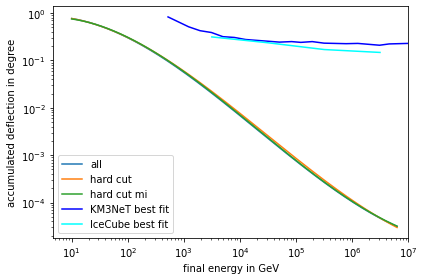

In [39]:
x = np.logspace(1, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), 0.02346311, -0.30322558, 0.34082957, -0.17725468)), label='all')
plt.plot(x, np.power(10, poly(np.log10(x), 0.02079745, -0.27869264,  0.2896827,  -0.14734355)), label='hard cut')
plt.plot(x, np.power(10, poly(np.log10(x),  0.02407291, -0.31206222 , 0.37943753, -0.21557717)), label='hard cut mi')
plt.plot(KM3NeT_median_error_E, KM3NeT_median_error_theta, '-', color='blue', label='KM3NeT best fit')
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube best fit')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.xlim(right=1e7)
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'compare_fits_different_cuts_E_min.pdf')

# DPG PLOTS

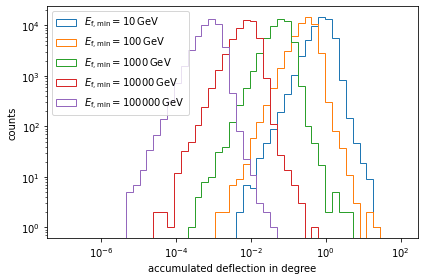

In [40]:
bins = np.logspace(-7, 2, 50)
mi = 0.9
plt.hist(df_dict['df_10'].deflection[df_dict['df_10'].E_f > mi * mode(df_dict['df_10'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_10'].E_f))))
plt.hist(df_dict['df_04'].deflection[df_dict['df_04'].E_f > mi * mode(df_dict['df_04'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_04'].E_f))))
plt.hist(df_dict['df_03'].deflection[df_dict['df_03'].E_f > mi * mode(df_dict['df_03'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_03'].E_f))))
plt.hist(df_dict['df_02'].deflection[df_dict['df_02'].E_f > mi * mode(df_dict['df_02'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_02'].E_f))))
plt.hist(df_dict['df_01'].deflection[df_dict['df_01'].E_f > mi * mode(df_dict['df_01'].E_f)], bins=bins, histtype='step', label=r'$E_\mathrm{f,min}'+' = {}\,$GeV'.format(int(mode(df_dict['df_01'].E_f))))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflections_DPG.pdf')

efit params:  [-0.57426301  0.40274137  0.73074468] , errors:  [0.11750144 0.04030672 0.14378387]


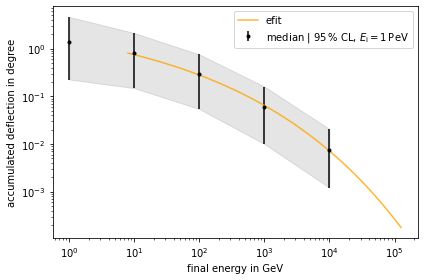

In [41]:
### fit deflection medians
x = np.logspace(0.1, 6, 1000)

E_f_dpg = []
deflection_median_1P_dpg = []
deflection_median_upper_1P_dpg = []
deflection_median_lower_1P_dpg = []
for e in [0, 2, 4, 6, 8]:
    E_f_dpg.append(E_f[e])
    deflection_median_1P_dpg.append(deflection_median_1P_cut_10[e])
    deflection_median_upper_1P_dpg.append(deflection_median_upper_1P_cut_10[e])
    deflection_median_lower_1P_dpg.append(deflection_median_lower_1P_cut_10[e])
# E_i = 1 PeV

# e-fit 
def efit(x, a, b, c):
    return a * np.exp(b * x) + c
params, cov = curve_fit(efit, np.log10(E_f_dpg), np.log10(deflection_median_1P_dpg))
errors = np.sqrt(np.diag(cov))
print('efit params: ', params, ', errors: ', errors) 
x = np.logspace(0.9, 5.1, 1000)
plt.plot(x, np.power(10, efit(np.log10(x), *params)), color='orange', alpha=0.8, label='efit')

plt.errorbar(E_f_dpg, deflection_median_1P_dpg, yerr=(deflection_median_lower_1P_dpg, deflection_median_upper_1P_dpg), fmt='.', color='black', alpha=1, label=r'median | $95\,$% CL, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f_dpg, np.array(deflection_median_1P_dpg)-np.array(deflection_median_lower_1P_dpg), np.array(deflection_median_1P_dpg) + np.array(deflection_median_upper_1P_dpg), alpha=0.1, color='black')



plt.xscale('log')
plt.yscale('log')
plt.xlabel('final energy in GeV')
plt.ylabel('accumulated deflection in degree')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_1PeV_DPG.pdf')